In [4]:
import pandas as pd
import numpy as np
import os
import json
import altair as alt

In [5]:
JSON_FILE = "../results/TP53/TP53_codons.fasta.ABSREL.json"
TREE_FILE = ""
pvalueThreshold = 0.05

In [25]:
def getABSRELData(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["branch attributes"]["0"]
#end method

def getABSRELHeaders(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["MLE"]["headers"]
#end method

"""
 "test results":{
   "P-value threshold":0.05,
   "positive test results":38,
   "tested":513
  }

"""

def getABSREL_TestResults(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["test results"]
#end method


def getABSREL_Input(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["input"]
#end method

In [9]:
data = getABSRELData(JSON_FILE)
data

{'NM_000546_6_Homo_sapiens_tumor_protein_p53_TP53_transcript_variant_1_mRNA_1': {'Baseline MG94xREV': 0,
  'Baseline MG94xREV omega ratio': 1,
  'Corrected P-value': 1,
  'Full adaptive model': 0,
  'Full adaptive model (non-synonymous subs/site)': 1e-10,
  'Full adaptive model (synonymous subs/site)': 1e-10,
  'LRT': 0,
  'Nucleotide GTR': 0,
  'Rate Distributions': [[1, 1]],
  'Rate classes': 1,
  'Uncorrected P-value': 1,
  'original name': 'NM_000546_6_Homo_sapiens_tumor_protein_p53_TP53_transcript_variant_1_mRNA_1'},
 'NM_001001903_1_Xenopus_tropicalis_tumor_protein_p53_tp53_mRNA_1': {'Baseline MG94xREV': 0.3553156485096583,
  'Baseline MG94xREV omega ratio': 0.09023473019886091,
  'Corrected P-value': 1,
  'Full adaptive model': 0.3573682991316892,
  'Full adaptive model (non-synonymous subs/site)': 0.105928121064852,
  'Full adaptive model (synonymous subs/site)': 0.2514401780668371,
  'LRT': 0,
  'Nucleotide GTR': 0.207445399589276,
  'Rate Distributions': [[0, 0.76056224168035

In [49]:
df = pd.DataFrame(data)
df = df.T
df

Baseline MG94xREV  \
NM_000546_6_Homo_sapiens_tumor_protein_p53_TP53...                 0   
NM_001001903_1_Xenopus_tropicalis_tumor_protein...          0.355316   
NM_001009294_1_Felis_catus_tumor_protein_p53_TP...          0.002638   
NM_001009403_1_Ovis_aries_tumor_protein_p53_TP5...          0.003521   
NM_001047151_2_Macaca_mulatta_tumor_protein_p53...          0.000029   
...                                                              ...   
XM_040453335_1_PREDICTED_Puma_yagouaroundi_tumo...          0.003637   
XM_041000460_1_PREDICTED_Ochotona_curzoniae_tum...          0.027666   
XM_041664596_1_PREDICTED_Microtus_oregoni_tumor...          0.043037   
XM_041712170_1_PREDICTED_Taeniopygia_guttata_tu...          0.049709   
XM_041771191_1_PREDICTED_Vulpes_lagopus_tumor_p...          0.001764   

                                                   Baseline MG94xREV omega ratio  \
NM_000546_6_Homo_sapiens_tumor_protein_p53_TP53...                             1   
NM_001001903_1_Xenopus_tropicalis_tumor_protein...                      0.090235   
NM_001009294_1_Felis_catus_tumor_protein_p53_TP...                             0   
NM_001009403_1_Ovis_aries_tumor_protein_p53_TP5...                      0.365046   
NM_001047151_2_Macaca_mulatta_tumor_protein_p53...                   10000000000   
...                                                                          ...   
XM_040453335_1_PREDICTED_Puma_yagouaroundi_tumo...                             0   
XM_041000460_1_PREDICTED_Ochotona_curzoniae_tum...                       0.74396   
XM_041664596_1_PREDICTED_Microtus_oregoni_tumor...                      0.588996   
XM_041712170_1_PREDICTED_Taeniopygia_guttata_tu...                      0.558657   
XM_041771191_1_PREDICTED_Vulpes_lagopus_tumor_p...                             0   

                                                   Corrected P-value  \
NM_000546_6_Homo_sapiens_tumor_protein_p53_TP53...                 1   
NM_001001903_1_Xenopus_tropicalis_tumor_protein...                 1   
NM_001009294_1_Felis_catus_tumor_protein_p53_TP...                 1   
NM_001009403_1_Ovis_aries_tumor_protein_p53_TP5...                 1   
NM_001047151_2_Macaca_mulatta_tumor_protein_p53...                 1   
...                                                              ...   
XM_040453335_1_PREDICTED_Puma_yagouaroundi_tumo...                 1   
XM_041000460_1_PREDICTED_Ochotona_curzoniae_tum...                 1   
XM_041664596_1_PREDICTED_Microtus_oregoni_tumor...                 0   
XM_041712170_1_PREDICTED_Taeniopygia_guttata_tu...          0.149631   
XM_041771191_1_PREDICTED_Vulpes_lagopus_tumor_p...                 1   

                                                   Full adaptive model  \
NM_000546_6_Homo_sapiens_tumor_protein_p53_TP53...                   0   
NM_001001903_1_Xenopus_tropicalis_tumor_protein...            0.357368   
NM_001009294_1_Felis_catus_tumor_protein_p53_TP...            0.002637   
NM_001009403_1_Ovis_aries_tumor_protein_p53_TP5...            0.003549   
NM_001047151_2_Macaca_mulatta_tumor_protein_p53...            0.000168   
...                                                                ...   
XM_040453335_1_PREDICTED_Puma_yagouaroundi_tumo...            0.003558   
XM_041000460_1_PREDICTED_Ochotona_curzoniae_tum...              0.0281   
XM_041664596_1_PREDICTED_Microtus_oregoni_tumor...             0.65763   
XM_041712170_1_PREDICTED_Taeniopygia_guttata_tu...            0.133593   
XM_041771191_1_PREDICTED_Vulpes_lagopus_tumor_p...            0.001769   

                                                   Full adaptive model (non-synonymous subs/site)  \
NM_000546_6_Homo_sapiens_tumor_protein_p53_TP53...                                            0.0   
NM_001001903_1_Xenopus_tropicalis_tumor_protein...                                       0.105928   
NM_001009294_1_Felis_catus_tumor_protein_p53_TP...                                            0.0   
NM_001009403_1_Ovis

### Selected Branches

In [124]:
df_results = df[df["Corrected P-value"] < 0.05]
df_results.reset_index(inplace=True)
df_results.index += 1
df_results.drop('index', axis=1, inplace=True)
df_results

print(df_results.to_markdown())

|    |   Baseline MG94xREV |   Baseline MG94xREV omega ratio |   Corrected P-value |   Full adaptive model |   Full adaptive model (non-synonymous subs/site) |   Full adaptive model (synonymous subs/site) |      LRT |   Nucleotide GTR | Rate Distributions                                                                    |   Rate classes |   Uncorrected P-value | original name                                                                                               |
|---:|--------------------:|--------------------------------:|--------------------:|----------------------:|-------------------------------------------------:|---------------------------------------------:|---------:|-----------------:|:--------------------------------------------------------------------------------------|---------------:|----------------------:|:------------------------------------------------------------------------------------------------------------|
|  1 |          0.271015   |                    

/Users/user/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [126]:
df_results = df[df["Corrected P-value"] < 0.05]
df_results['Name'] = df_results.index
df_results.reset_index(inplace=True)
df_results.index += 1
df_results

/Users/user/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


index Baseline MG94xREV  \
1                                             Node102          0.271015   
2                                             Node123          0.247485   
3                                             Node185          0.014851   
4                                             Node222          0.068857   
5                                             Node236          0.147321   
6                                             Node248          0.049413   
7                                             Node262          0.214756   
8                                             Node286          0.216423   
9                                             Node309          0.019391   
10                                            Node413          0.023949   
11                                            Node437           0.05623   
12                                            Node485          0.040963   
13                                             Node79          0.173598   
14                                             Node80          0.114996   
15                                             Node81          0.122433   
16  XM_005749774_1_PREDICTED_Pundamilia_nyererei_c...          0.008172   
17  XM_007952255_1_PREDICTED_Orycteropus_afer_afer...          0.103901   
18  XM_008010192_2_PREDICTED_Chlorocebus_sabaeus_t...           0.04575   
19  XM_008321788_3_PREDICTED_Cynoglossus_semilaevi...          0.356247   
20  XM_010571169_1_PREDICTED_Haliaeetus_leucocepha...          0.110145   
21  XM_011727613_2_PREDICTED_Macaca_nemestrina_tum...          0.031578   
22  XM_014019513_1_PREDICTED_Austrofundulus_limnae...          0.248904   
23  XM_014261886_1_PREDICTED_Pseudopodoces_humilis...             0.121   
24  XM_014893382_1_PREDICTED_Sturnus_vulgaris_tumo...          0.176395   
25  XM_015541817_1_PREDICTED_Panthera_tigris_altai...          0.135205   
26  XM_015562573_1_PREDICTED_Myotis_davidii_tumor_...          0.042231   
27  XM_015992323_1_PREDICTED_Peromyscus_maniculatu...          0.125564   
28  XM_016931470_2_PREDICTED_Pan_troglodytes_tumor...          0.071423   
29  XM_025195179_1_PREDICTED_Alligator_sinensis_tu...          0.059468   
30  XM_028780049_1_PREDICTED_Grammomys_surdaster_t...          0.041931   
31  XM_030474375_1_PREDICTED_Strigops_habroptila_t...           0.06101   
32  XM_030548110_1_PREDICTED_Gopherus_evgoodei_tum...           0.05508   
33  XM_030861565_1_PREDICTED_Globicephala_melas_tu...          0.035597   
34  XM_030970056_1_PREDICTED_Camarhynchus_parvulus...          0.120016   
35  XM_032280430_1_PREDICTED_Sapajus_apella_tumor_...          0.024262   
36  XM_032794536_1_PREDICTED_Chelonoidis_abingdoni...          0.051585   
37  XM_035135727_1_PREDICTED_Zootoca_vivipara_tumo...          0.213434   
38  XM_041664596_1_PREDICTED_Microtus_oregoni_tumo...          0.043037   

   Baseline MG94xREV omega ratio Corrected P-value Full adaptive model  \
1                       0.248128          0.001011            1.247173   
2                       0.402128          0.022488          379.634912   
3                       0.518222          0.000322            0.175039   
4                    10000000000          0.048301            1.049167   
5                       0.783096          0.011495            0.658764   
6                       0.248901          0.039137            2.749323   
7                       0.410058          0.000978            0.871563   
8                       0.404559           0.00335            0.909491   
9                       0.467868          0.003431            2.814981   
10                      0.406299                 0            0.582777   
11                      0.445824           0.00019            0.323557   
12                      0.863876                 0             0.40471   
13                      0.346965          0.012005             2.73766   
14                      0.809018          0.002801            1.734399   
15          

In [127]:
df_results.shape

(38, 14)

## Visualize

In [32]:
x = getABSREL_Input(JSON_FILE)
TREE = x["trees"]["0"]
TREE 

'(NM_000546_6_Homo_sapiens_tumor_protein_p53_TP53_transcript_variant_1_mRNA_1,((((((((((((((((((((NM_011640_3_Mus_musculus_transformation_related_protein_53_Trp53_transcript_variant_1_mRNA_1,XM_021177210_2_PREDICTED_Mus_caroli_tumor_protein_p53_Tp53_transcript_variant_X1_mRNA_1)Node22,XM_021212574_2_PREDICTED_Mus_pahari_tumor_protein_p53_Tp53_transcript_variant_X1_mRNA_1)Node21,XM_031351448_1_PREDICTED_Mastomys_coucha_tumor_protein_p53_Tp53_transcript_variant_X1_mRNA_1)Node20,(XM_028780049_1_PREDICTED_Grammomys_surdaster_tumor_protein_p53_Tp53_transcript_variant_X1_mRNA_1,XM_034505539_1_PREDICTED_Arvicanthis_niloticus_tumor_protein_p53_Tp53_transcript_variant_X1_mRNA_1)Node27)Node19,(NM_030989_3_Rattus_norvegicus_tumor_protein_p53_Tp53_mRNA_1,XM_032912336_1_PREDICTED_Rattus_rattus_tumor_protein_p53_Tp53_transcript_variant_X1_mRNA_1)Node30)Node18,XM_021648173_1_PREDICTED_Meriones_unguiculatus_tumor_protein_p53_Tp53_transcript_variant_X1_mRNA_1)Node17,(((NM_001243976_1_Cricetulus_griseus

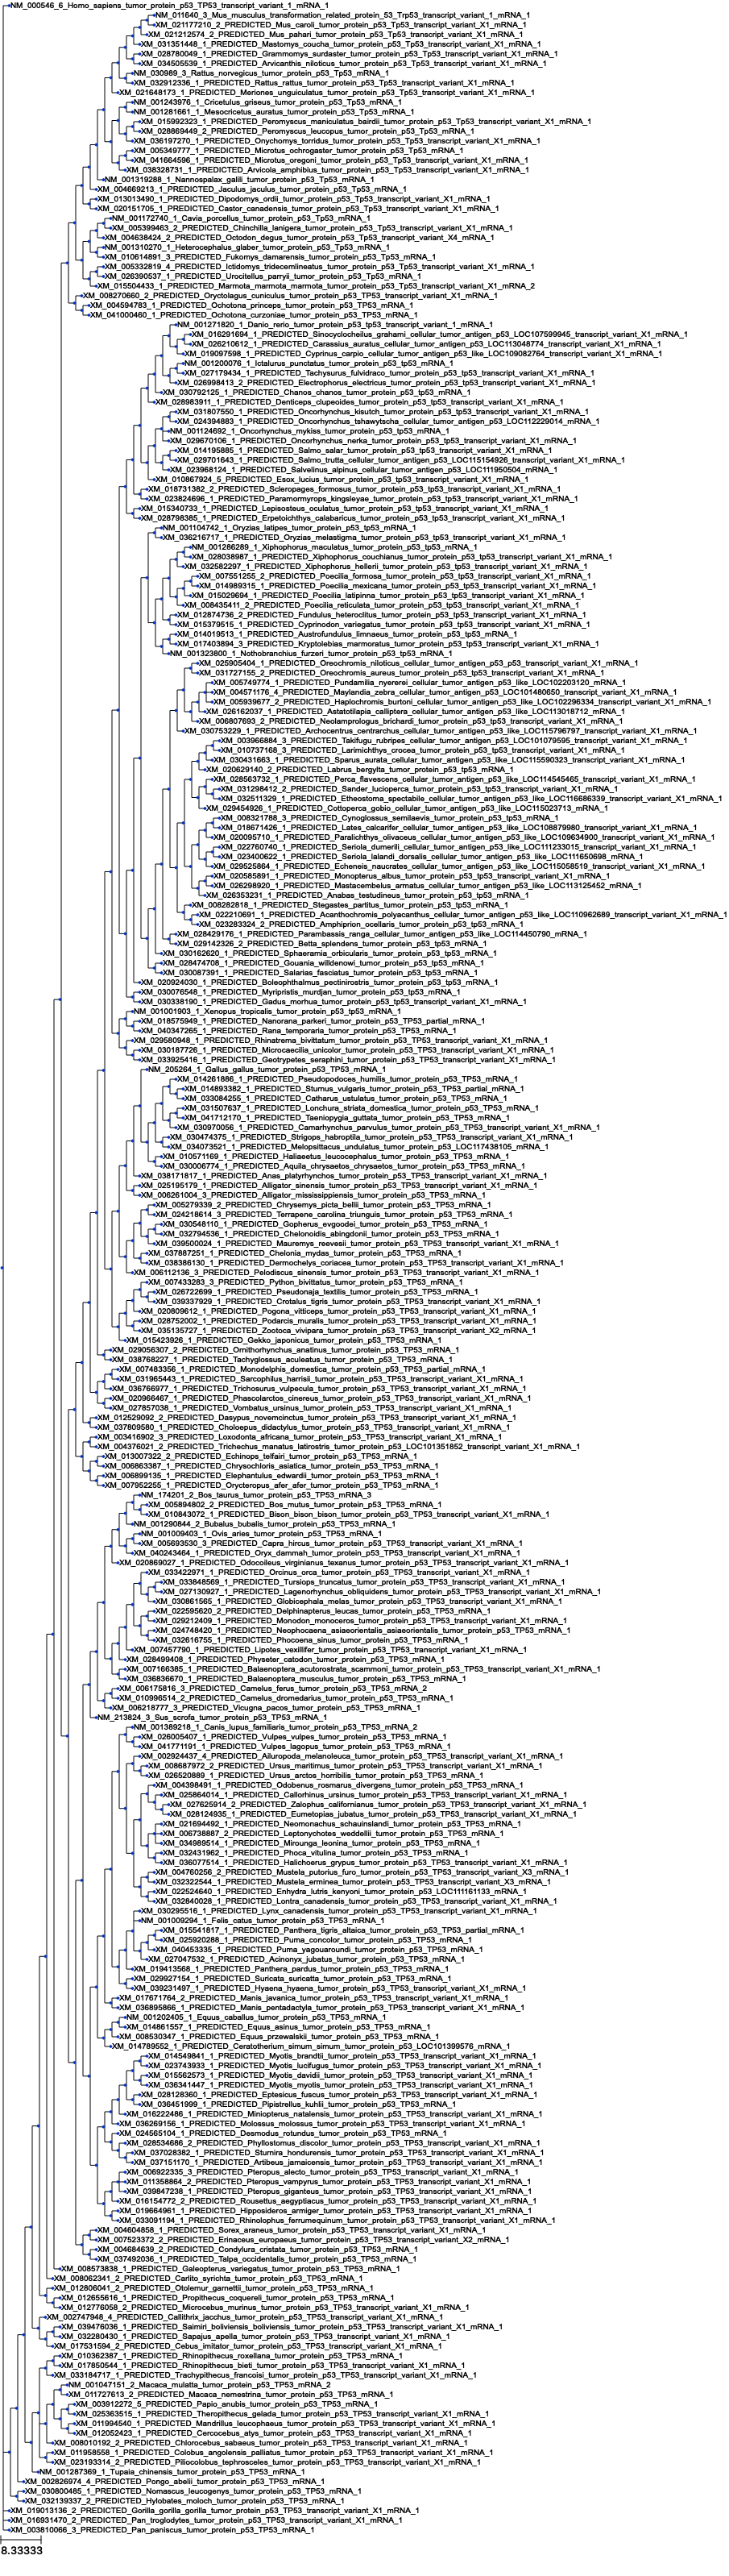

In [34]:
from ete3 import Tree
#t = Tree( "((a,b),c);" )
t = Tree(TREE+";", format=1)
#t.render("mytree.png")
t.render("%%inline")  

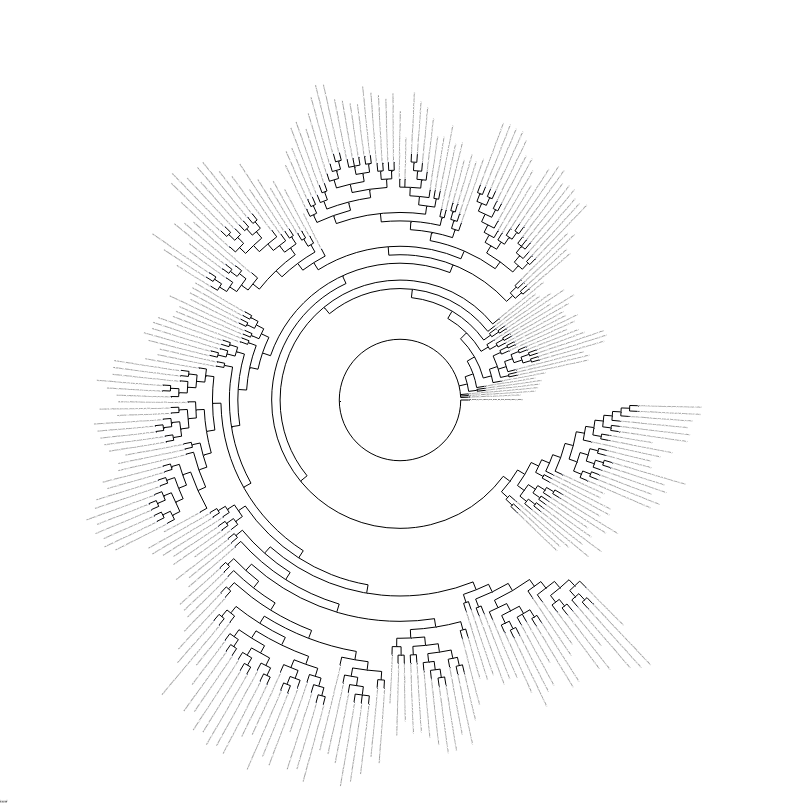

In [59]:
from ete3 import TreeStyle

t = Tree(TREE+";", format=1)
ts = TreeStyle()
ts.mode = "c" # use circular mode 

t.render("%%inline", tree_style=ts, w=800)  

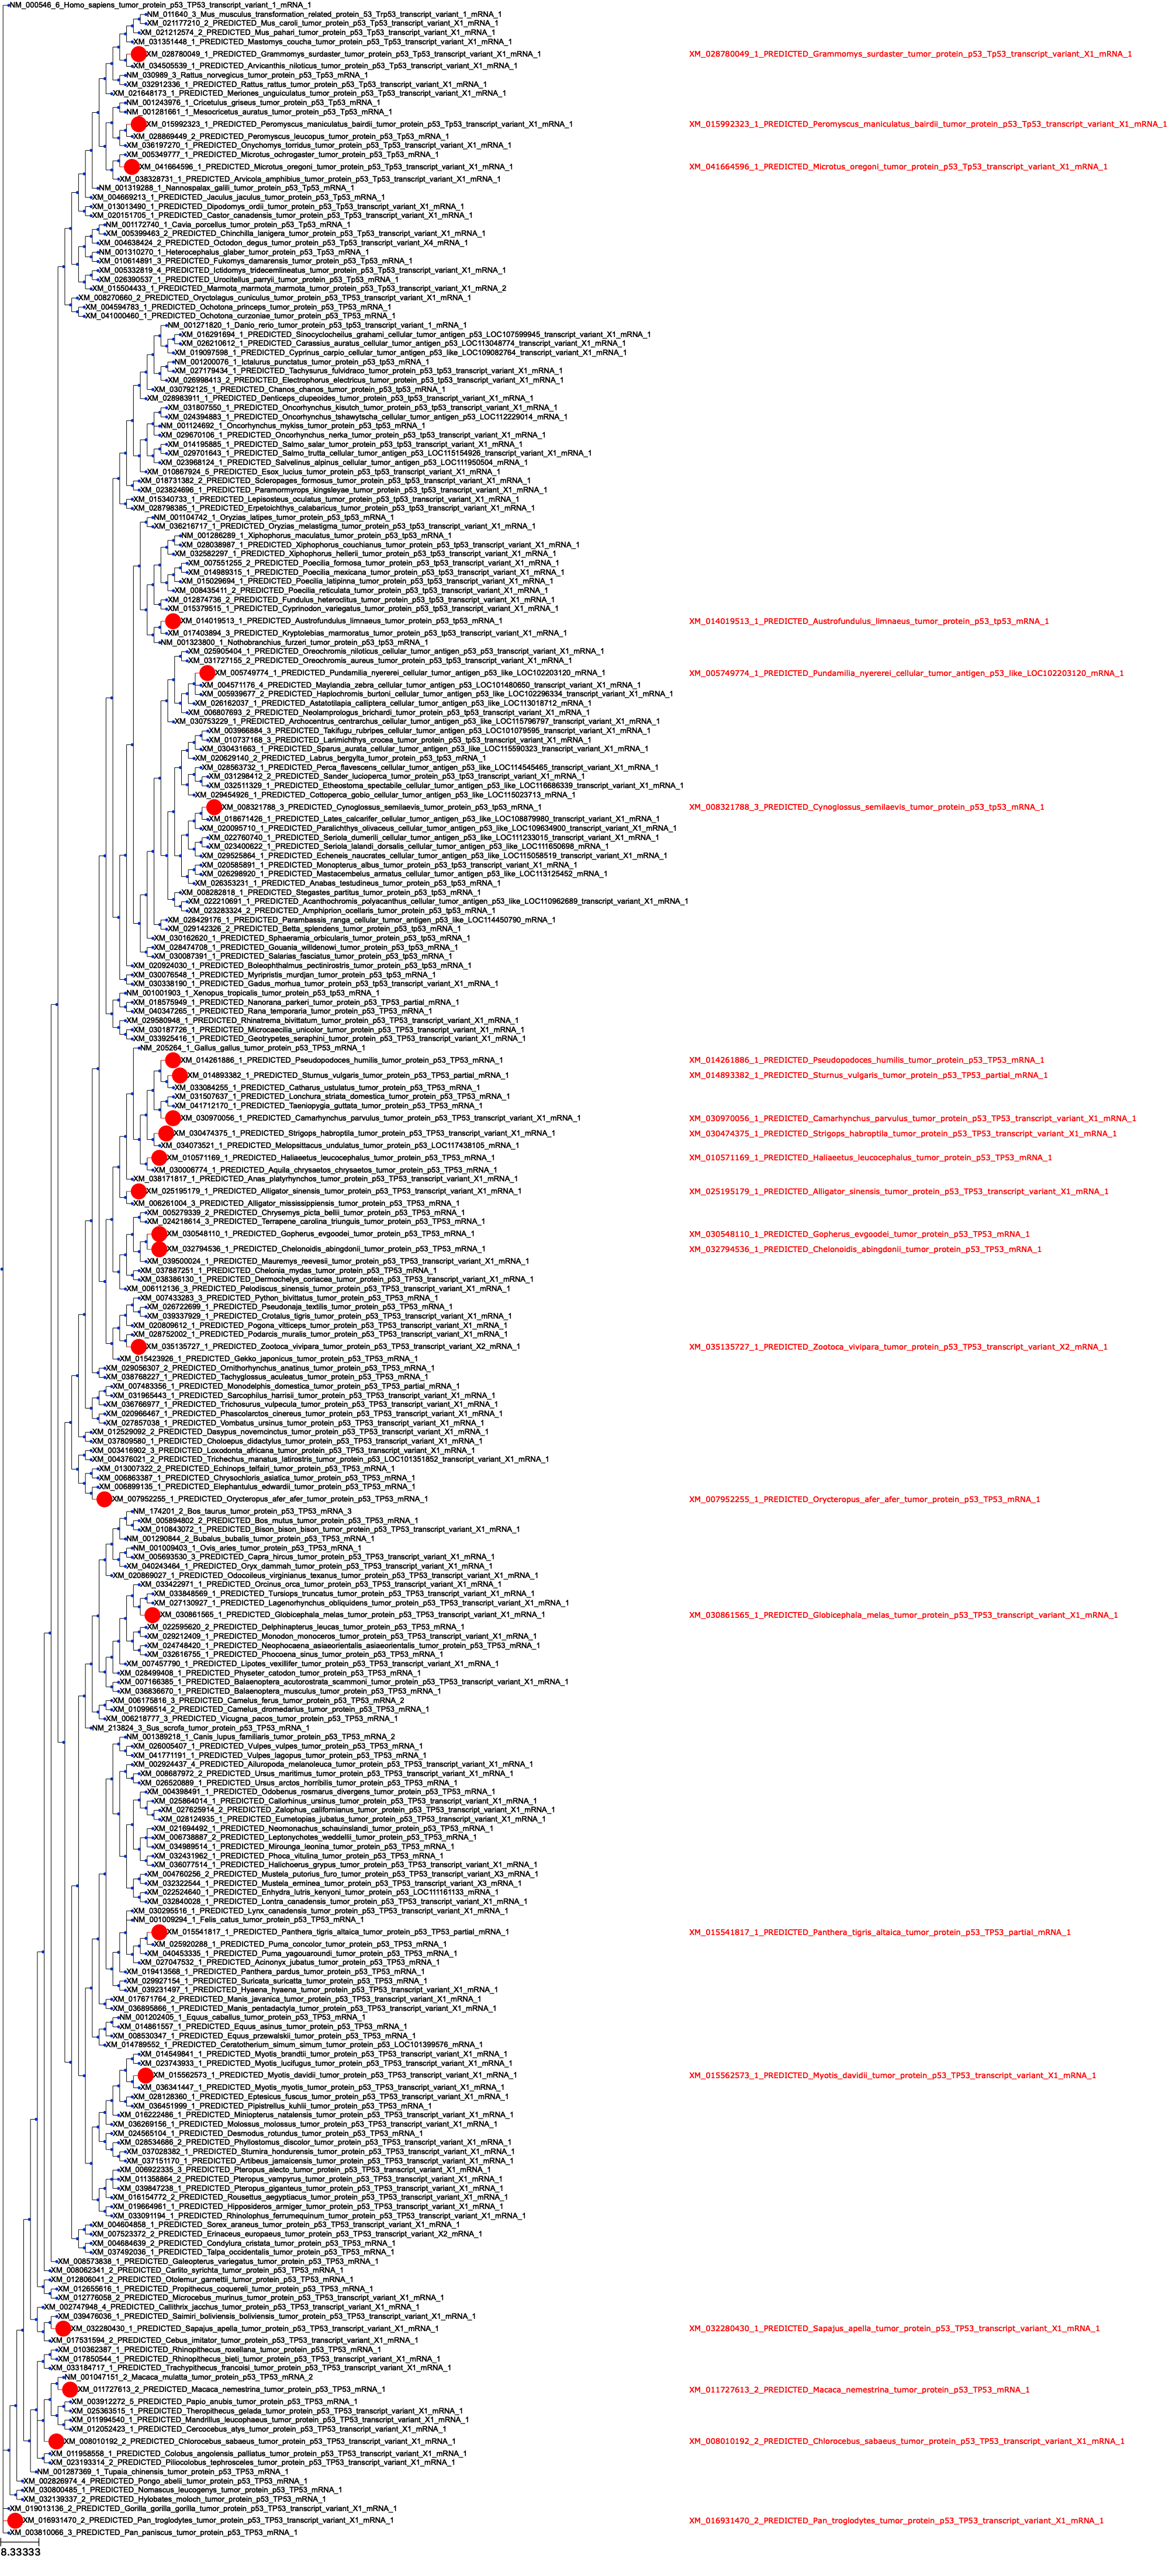

In [108]:
from ete3 import TreeStyle
from ete3 import Tree, TreeStyle, NodeStyle, AttrFace

t = Tree(TREE+";", format=1)
ts = TreeStyle()
#ts.show_leaf_name = True
ts.mode = "c" # use circular mode 

for l in t.iter_leaves():
    #print([str(l).replace("--", "").replace("\n", "")])
    
    if str(l).replace("--", "").replace("\n", "") not in df_results["Name"].to_list(): 
        #print("#Skipping:", l)
        continue
    #print("# Processing:", l)
        
    # create a new label with a color attribute
    N = AttrFace("name", fgcolor="Red")
    # label margins
    N.margin_top = N.margin_bottom = N.margin_left = 0.0
    # labels aligned to the same level
    l.add_face(N, 0, position='aligned')
    
    # optionally colorize nodes too
    ns = NodeStyle()
    ns["fgcolor"] = "Red"
    ns["size"] = 20
    ns["vt_line_color"] = "Red"
    ns["hz_line_color"] = "Red"
    
    #l.set_style(ns)
    l.img_style = ns
    
    
    
#end for

t.render("%%inline", w=2000)  

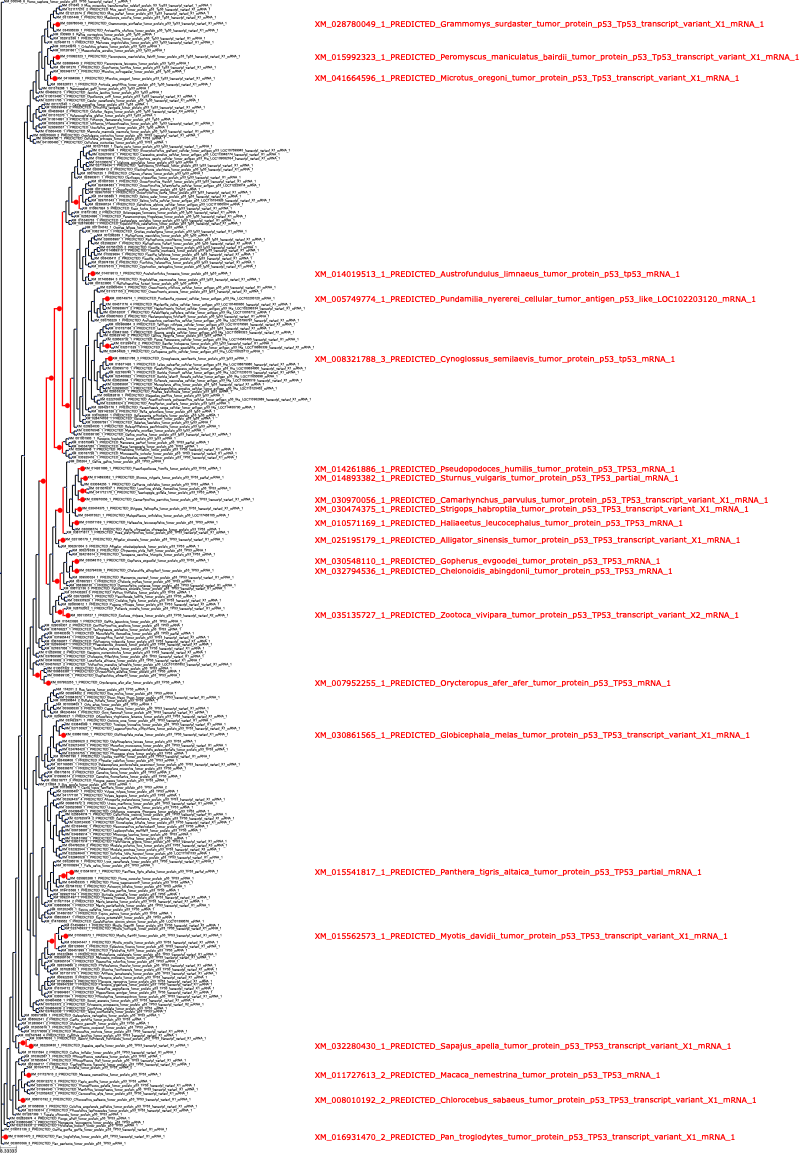

In [146]:
from ete3 import TreeStyle
from ete3 import Tree, TreeStyle, NodeStyle, AttrFace

t = Tree(TREE+";", format=1)
ts = TreeStyle()
#ts.show_leaf_name = True
ts.mode = "c" # use circular mode 
ts.show_branch_length = True
ts.show_scale = True

#for l in t.iter_leaves():
for l in t.traverse("postorder"):
    #print([str(l).replace("--", "").replace("\n", "")])
    
    #if str(l).replace("--", "").replace("\n", "") not in df_results["Name"].to_list(): 
    if l.name not in df_results["Name"].to_list(): 
        #print("#Skipping:", l)
        continue
    #print("# Processing:", l)
        
    # create a new label with a color attribute
    N = AttrFace("name", fgcolor="Red", fsize=24)
    # label margin
    N.margin_top = N.margin_bottom = N.margin_left = 0.0
    # labels aligned to the same level
    l.add_face(N, 0, position='aligned')
    
    # optionally colorize nodes too
    ns = NodeStyle()
    ns["fgcolor"] = "Red"
    ns["size"] = 15
    ns["vt_line_color"] = "Red"
    ns["hz_line_color"] = "Red"
    ns["vt_line_width"] = 4
    ns["hz_line_width"] = 4
    #style["vt_line_type"] = 0 # 0 solid, 1 dashed, 2 dotted
    #style["hz_line_type"] = 0
    
    #l.set_style(ns)
    l.img_style = ns
#end for

t.render("%%inline", w=800, dpi=300)  

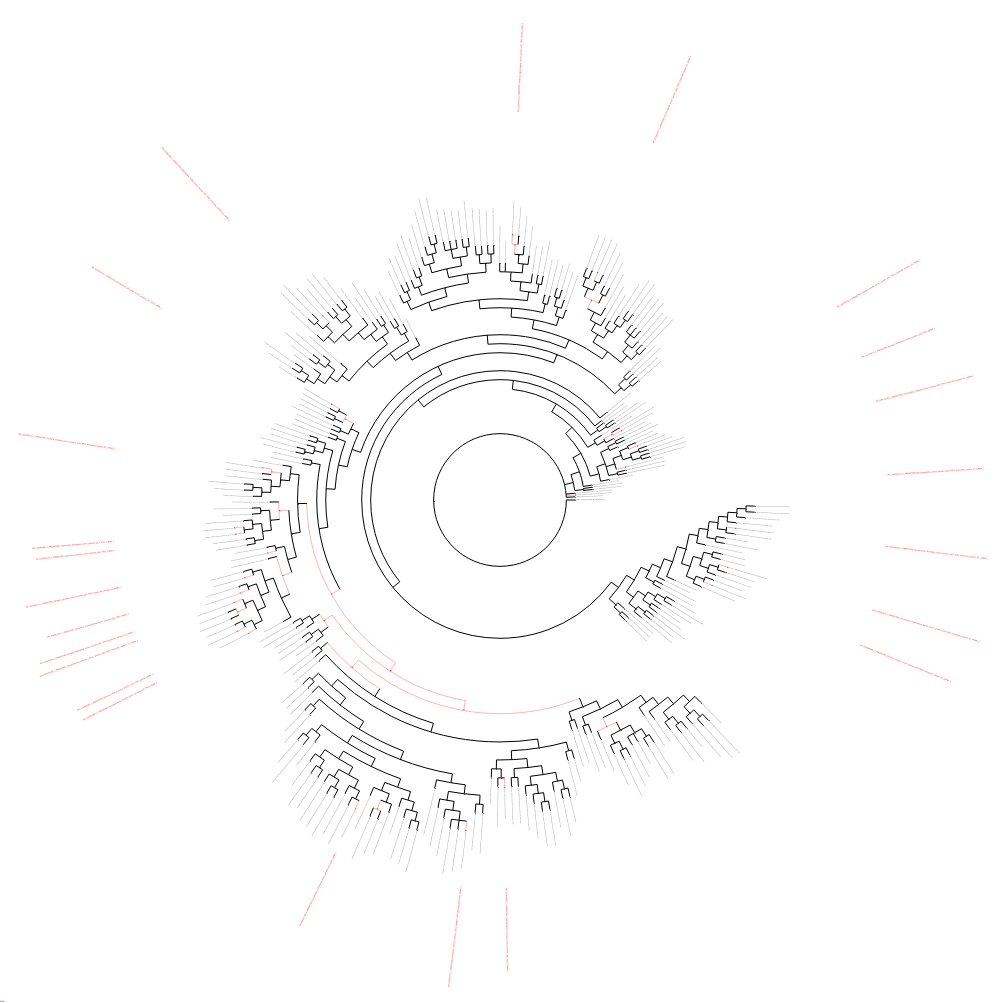

In [139]:
from ete3 import Tree, TreeStyle, NodeStyle, AttrFace

t = Tree(TREE+";", format=1)
ts = TreeStyle()
#ts.show_leaf_name = True
ts.mode = "c" # use circular mode 
ts.show_branch_length = True
ts.show_scale = True

#for l in t.iter_leaves():
for l in t.traverse("postorder"):
    #print([str(l).replace("--", "").replace("\n", "")])
    
    #if str(l).replace("--", "").replace("\n", "") not in df_results["Name"].to_list(): 
    if l.name not in df_results["Name"].to_list(): 
        #print("#Skipping:", l)
        continue
    #print("# Processing:", l)
        
    # create a new label with a color attribute
    N = AttrFace("name", fgcolor="Red", fsize=24)
    # label margin
    N.margin_top = N.margin_bottom = N.margin_left = 0.0
    # labels aligned to the same level
    l.add_face(N, 0, position='aligned')
    
    # optionally colorize nodes too
    ns = NodeStyle()
    ns["fgcolor"] = "Red"
    ns["size"] = 15
    ns["vt_line_color"] = "Red"
    ns["hz_line_color"] = "Red"
    ns["vt_line_width"] = 4
    ns["hz_line_width"] = 4
    #style["vt_line_type"] = 0 # 0 solid, 1 dashed, 2 dotted
    #style["hz_line_type"] = 0
    
    #l.set_style(ns)
    l.img_style = ns
#end for

t.render("%%inline", tree_style=ts, w=1000)  























## Figure legend.

In [23]:
## Summary
#a = len(df["omega"])
#b = len(negative_sites["omega"])

x = getABSREL_TestResults(JSON_FILE)
#print(x)

a = x["tested"]
b = x['positive test results']

print("aBSREL analysis of your gene of interest found " + str(b) + " of " + str(a) + " branches to be statisically significant (p-value <= " + str(pvalueThreshold) + ") for episodic diversifying selection." )


aBSREL analysis of your gene of interest found 38 of 513 branches to be statisically significant (p-value <= 0.05) for episodic diversifying selection
